# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

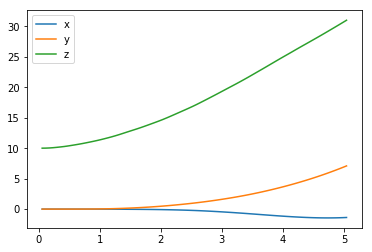

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

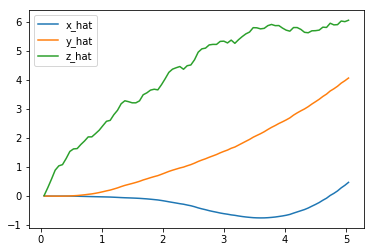

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

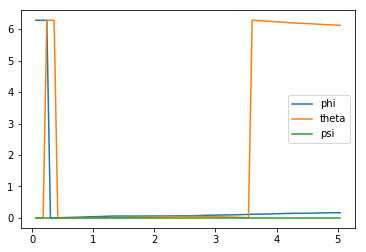

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

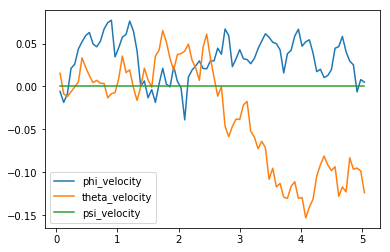

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

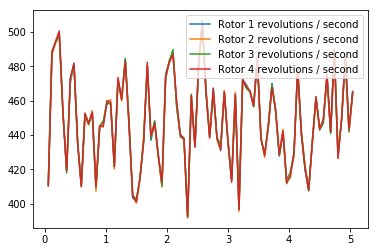

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.377003    7.08985099 31.00000788  0.16458332  6.12096581  0.        ]
[0.47221855 4.06671827 6.05763983]
[ 0.00499251 -0.12366078  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 750
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  266, score =  35.210 (best =  41.116), noise_scale = 3.255

/Users/pinnermx/dev/nd101/quad/RL-Quadcopter-2/physics_sim.py:131: RuntimeWarning: overflow encountered in multiply
  angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt ** 2
/Users/pinnermx/dev/nd101/quad/RL-Quadcopter-2/physics_sim.py:132: RuntimeWarning: invalid value encountered in remainder
  angles = (angles + 2 * np.pi) % (2 * np.pi)
/Users/pinnermx/dev/nd101/quad/RL-Quadcopter-2/physics_sim.py:90: RuntimeWarning: overflow encountered in multiply
  drag_moment =  self.C_d * 0.5 * self.rho * self.angular_v * np.absolute(self.angular_v) * self.areas * self.dims * self.dims
/Users/pinnermx/dev/nd101/quad/RL-Quadcopter-2/physics_sim.py:133: RuntimeWarning: invalid value encountered in add
  self.angular_v = self.angular_v + self.angular_accels * self.dt


Episode =  750, score =  33.242 (best =  42.033), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## Train your agent here.
import sys
import pandas as pd
from agents.agent import Agent
from agents.agent import Actor, Critic
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = Agent(task) 


for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state, done)
        state = next_state
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.get_score(), agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

/Users/pinnermx/anaconda3/envs/quadcop/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Episode =  100, score =  34.966 (best =  39.722)

In [11]:
import keras


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [126]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

target_pos = np.array([0., 0., 30.])  # TARGET pose


# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = Agent(task)
done = False
labels = ['reward', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

episodes = {x : [] for x in labels}

num_episodes = 1000

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode()
        episode_reward = 0

        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action,reward,next_state, done)
            state = next_state
            rotor_speeds = agent.act(state)
            _, _, done = task.step(rotor_speeds)
            to_write = [reward] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                episodes[labels[ii]].append(to_write[ii])

            if i_episode == num_episodes :
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
            
            
           
            
            episode_reward += reward
            if done:
            #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
            #        i_episode, agent.get_score(), agent.best_score), end="")  # [debug]
                
                print("\rEpisode = {:4d}, score = {:7.3f}, best = {:7.3f}, total = {:7.3f}"\
                    .format(i_episode, agent.get_score(), agent.best_score, episode_reward), end=" ")
                print(task.sim.pose[:3])
            
            
                break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1, score =  14.925, best =    -inf, total = 179.095 [-12.86897363  -0.74829163   0.        ]
Episode =    2, score =  14.935, best =  14.925, total = 179.217 [-12.44272913  -0.60737296   0.        ]
Episode =    3, score =  14.789, best =  14.935, total = 192.255 [-13.0369254   -2.21013786   0.        ]
Episode =    4, score =  14.920, best =  14.935, total = 149.199 [-8.62489363 -1.46058449  0.        ]
Episode =    5, score =  14.950, best =  14.935, total = 134.550 [-7.22051058  1.14725881  0.        ]
Episode =    6, score =  14.925, best =  14.950, total = 134.327 [-6.9744383   2.36262065  0.        ]
Episode =    7, score =  14.909, best =  14.950, total = 134.178 [-6.62784642  3.50418116  0.        ]
Episode =    8, score =  14.906, best =  14.950, total = 134.153 [-6.33518474  3.98203586  0.        ]
Episode =    9, score =  14.904, best =  14.950, total = 134.133 [-5.70062898  

Episode =   79, score =  14.654, best =  15.174, total = 615.453 [ 17.53144785 -14.46864274  91.96440545]
Episode =   80, score =  14.380, best =  15.174, total = 603.963 [ 26.97146804 -22.24024502  87.63903889]
Episode =   81, score =  15.079, best =  15.174, total = 633.319 [-3.39275677  1.33962162 96.46110023]
Episode =   82, score =  14.551, best =  15.174, total = 611.161 [22.87286823 -7.5586402  93.653634  ]
Episode =   83, score =  14.916, best =  15.174, total = 626.491 [-22.13534086  13.50883331  89.84446585]
Episode =   84, score =  14.620, best =  15.174, total = 614.046 [ 14.68088195 -15.12103239  93.72126939]
Episode =   85, score =  14.748, best =  15.174, total = 619.436 [14.46908532 11.82753898 94.5022566 ]
Episode =   86, score =  14.558, best =  15.174, total = 611.447 [-39.77514188  -7.23281671  82.89833392]
Episode =   87, score =  14.453, best =  15.174, total = 607.039 [-37.47444491 -18.66413601  81.22176553]
Episode =   88, score =  14.844, best =  15.174, total 

Episode =  158, score =  15.045, best =  15.191, total = 631.900 [-5.60547566 11.71385218 95.42030343]
Episode =  159, score =  15.054, best =  15.191, total = 632.250 [ 2.7014815   7.21618608 96.12744477]
Episode =  160, score =  15.112, best =  15.191, total = 634.701 [-11.82739456   8.75709285  94.4521991 ]
Episode =  161, score =  14.955, best =  15.191, total = 628.124 [-9.04969574 16.12981032 94.21207285]
Episode =  162, score =  14.297, best =  15.191, total = 600.467 [-21.73705693  48.29823889  76.24659122]
Episode =  163, score =  14.724, best =  15.191, total = 618.410 [12.72443045 18.17864127 93.35959179]
Episode =  164, score =  15.044, best =  15.191, total = 631.849 [ 0.60969716 15.62727617 95.23707924]
Episode =  165, score =  14.594, best =  15.191, total = 612.955 [35.50119985  6.7825929  86.26068669]
Episode =  166, score =  14.404, best =  15.191, total = 604.964 [ 33.51987185 -11.83103284  87.40948445]
Episode =  167, score =  15.004, best =  15.191, total = 630.149

Episode =  237, score =  14.497, best =  15.191, total = 608.860 [-54.39059196  -1.20411294  68.38985065]
Episode =  238, score =  15.010, best =  15.191, total = 630.420 [-15.09795137   6.28090217  94.46794793]
Episode =  239, score =  14.901, best =  15.191, total = 625.821 [ 5.87360947 15.47775251 94.78610656]
Episode =  240, score =  14.520, best =  15.191, total = 609.855 [33.56687537 13.26157439 86.56276875]
Episode =  241, score =  15.121, best =  15.191, total = 635.076 [-12.28387958   1.78213083  94.83718517]
Episode =  242, score =  14.767, best =  15.191, total = 620.205 [-17.07049144  25.79367815  88.63540071]
Episode =  243, score =  14.363, best =  15.191, total = 603.257 [-43.15480438  26.43244912  73.96819064]
Episode =  244, score =  14.697, best =  15.191, total = 617.268 [-17.94503     30.90375755  86.29771472]
Episode =  245, score =  14.912, best =  15.191, total = 626.323 [-19.14109361   9.64737412  91.99794449]
Episode =  246, score =  14.347, best =  15.191, tot

Episode =  318, score =  15.156, best =  15.191, total = 197.034 [-0.66120392  0.34662505  0.        ]
Episode =  319, score =  15.012, best =  15.191, total = 180.139 [1.07807294 0.40285242 0.        ]
Episode =  320, score =  15.156, best =  15.191, total = 197.033 [-1.62121216  0.47682132  0.        ]
Episode =  321, score =  15.173, best =  15.191, total = 197.243 [-0.51237337  0.48889696  0.        ]
Episode =  322, score =  15.153, best =  15.191, total = 196.991 [-1.20895644  0.58796466  0.        ]
Episode =  323, score =  15.127, best =  15.191, total = 196.652 [-0.42752325  0.40613928  0.        ]
Episode =  324, score =  15.009, best =  15.191, total = 180.105 [ 0.44025729 -0.2546386   0.        ]
Episode =  325, score =  15.002, best =  15.191, total = 180.023 [0.21563355 0.87763902 0.        ]
Episode =  326, score =  15.188, best =  15.191, total = 182.261 [-0.67387858  0.8372106   0.        ]
Episode =  327, score =  14.946, best =  15.191, total = 179.347 [0.83320548 3.

Episode =  397, score =  14.815, best =  15.214, total = 622.239 [18.56682591  9.71754731 92.97340916]
Episode =  398, score =  14.515, best =  15.214, total = 609.640 [52.02943304  0.95289365 92.491564  ]
Episode =  399, score =  14.785, best =  15.214, total = 620.974 [23.47940109 -1.04641954 93.42571452]
Episode =  400, score =  14.831, best =  15.214, total = 622.901 [19.1006596  -1.47680976 93.48523962]
Episode =  401, score =  14.786, best =  15.214, total = 621.028 [-4.80038479 32.11964151 91.540537  ]
Episode =  402, score =  14.728, best =  15.214, total = 618.593 [-18.19535224 -14.40812519  92.19528058]
Episode =  403, score =  14.687, best =  15.214, total = 616.870 [ 19.7338699  -13.13250917  91.90129815]
Episode =  404, score =  15.050, best =  15.214, total = 632.086 [-5.72371065 12.59368218 95.1227817 ]
Episode =  405, score =  14.925, best =  15.214, total = 626.868 [-21.52586521   0.44933191  93.19347877]
Episode =  406, score =  14.825, best =  15.214, total = 622.666

Episode =  476, score =  15.025, best =  15.214, total = 255.418 [ 1.94230375 -0.76706001  0.        ]
Episode =  477, score =  15.013, best =  15.214, total = 255.216 [4.86272096 0.30231394 0.        ]
Episode =  478, score =  15.182, best =  15.214, total = 258.099 [-1.7611319   0.91599126  0.        ]
Episode =  479, score =  15.128, best =  15.214, total = 257.171 [-1.32138352  1.24289013  0.        ]
Episode =  480, score =  15.005, best =  15.214, total = 255.088 [3.5411734  0.99868757 0.        ]
Episode =  481, score =  15.171, best =  15.214, total = 257.914 [-0.66296185  1.32182296  0.        ]
Episode =  482, score =  15.178, best =  15.214, total = 258.021 [-2.2016631   1.05554386  0.        ]
Episode =  483, score =  15.001, best =  15.214, total = 255.020 [2.47891798 1.54545667 0.        ]
Episode =  484, score =  15.140, best =  15.214, total = 257.382 [-0.24905216  0.84730736  0.        ]
Episode =  485, score =  15.171, best =  15.214, total = 257.905 [-3.52399252  1.1

Episode =  557, score =  15.052, best =  15.214, total = 255.883 [0.60522329 1.02515644 0.        ]
Episode =  558, score =  15.025, best =  15.214, total = 255.420 [2.08432487 1.1054314  0.        ]
Episode =  559, score =  15.145, best =  15.214, total = 257.458 [-1.1569778   1.29215078  0.        ]
Episode =  560, score =  15.145, best =  15.214, total = 257.458 [-1.05176396  1.2708524   0.        ]
Episode =  561, score =  15.078, best =  15.214, total = 256.331 [1.43645204 1.11907546 0.        ]
Episode =  562, score =  15.171, best =  15.214, total = 257.911 [-1.35857409  0.96785176  0.        ]
Episode =  563, score =  15.071, best =  15.214, total = 256.205 [2.29520321 0.71714649 0.        ]
Episode =  564, score =  15.171, best =  15.214, total = 257.903 [-2.33268165  0.88890729  0.        ]
Episode =  565, score =  15.008, best =  15.214, total = 255.139 [2.901877  1.0960302 0.       ]
Episode =  566, score =  15.191, best =  15.214, total = 258.248 [-3.49448958  0.69608954  

Episode =  636, score =  14.902, best =  15.221, total = 625.891 [-9.7670863  20.25902517 92.86281805]
Episode =  637, score =  14.702, best =  15.221, total = 617.503 [-18.23098075 -16.41871065  91.73763702]
Episode =  638, score =  15.044, best =  15.221, total = 631.860 [-12.64675923  -2.8427397   94.84458584]
Episode =  639, score =  14.701, best =  15.221, total = 617.442 [-38.17734234  12.06355741  81.6761177 ]
Episode =  640, score =  14.836, best =  15.221, total = 623.126 [22.78326548  2.95585946 93.7937286 ]
Episode =  641, score =  14.333, best =  15.221, total = 601.982 [ 32.35738676 -21.53389397  84.04040106]
Episode =  642, score =  14.822, best =  15.221, total = 622.530 [-31.09709861   7.47488727  88.09938636]
Episode =  643, score =  14.548, best =  15.221, total = 610.995 [-23.46791767 -23.36602972  87.70976227]
Episode =  644, score =  15.054, best =  15.221, total = 632.265 [-11.21550847   2.56078059  95.53083908]
Episode =  645, score =  14.852, best =  15.221, tot

Episode =  715, score =  14.893, best =  15.221, total = 625.496 [10.25445177  2.69228333 96.292196  ]
Episode =  716, score =  14.870, best =  15.221, total = 624.545 [11.9018245  -1.14271525 95.84059869]
Episode =  717, score =  14.826, best =  15.221, total = 622.694 [  8.35640671 -12.80758793  94.50008083]
Episode =  718, score =  14.533, best =  15.221, total = 610.393 [-54.79600026   6.13003154  67.7927661 ]
Episode =  719, score =  14.968, best =  15.221, total = 628.637 [-27.77664619   2.77565261  89.72539975]
Episode =  720, score =  14.293, best =  15.221, total = 600.290 [ 14.58037978 -39.71576987  81.5745615 ]
Episode =  721, score =  15.083, best =  15.221, total = 633.475 [-12.8906551    3.51887877  95.50551337]
Episode =  722, score =  14.436, best =  15.221, total = 606.310 [-37.58875057 -20.24766544  78.93994888]
Episode =  723, score =  14.782, best =  15.221, total = 620.832 [10.40951033 20.9804721  92.63670648]
Episode =  724, score =  14.477, best =  15.221, total 

Episode =  793, score =  15.058, best =  15.221, total = 632.455 [-8.74529884 12.63702267 94.49003026]
Episode =  794, score =  15.071, best =  15.221, total = 632.972 [ 5.73414013  3.38190296 96.17188066]
Episode =  795, score =  14.928, best =  15.221, total = 626.976 [ 3.54147475 -6.08101581 96.21840065]
Episode =  796, score =  14.940, best =  15.221, total = 627.460 [-16.13135615  15.73825645  91.53496203]
Episode =  797, score =  14.913, best =  15.221, total = 626.366 [  4.75393792 -13.89909667  94.4408291 ]
Episode =  798, score =  14.698, best =  15.221, total = 617.305 [-32.50713079  -2.9343238   88.82920349]
Episode =  799, score =  15.010, best =  15.221, total = 630.430 [-1.05594649 14.84274856 94.74438446]
Episode =  800, score =  14.886, best =  15.221, total = 625.200 [-27.80782382   8.65650997  89.19735485]
Episode =  801, score =  14.651, best =  15.221, total = 615.353 [-26.77880022 -12.63987802  90.06135493]
Episode =  802, score =  15.159, best =  15.221, total = 6

Episode =  872, score =  14.932, best =  15.221, total = 627.140 [-24.80421255   8.89127772  89.77107628]
Episode =  873, score =  14.568, best =  15.221, total = 611.836 [-38.41589737 -10.17340881  82.57613812]
Episode =  874, score =  14.933, best =  15.221, total = 627.199 [-27.8369213    4.41616562  89.30429741]
Episode =  875, score =  14.820, best =  15.221, total = 622.435 [-15.72567327 -10.32532719  93.34474027]
Episode =  876, score =  14.694, best =  15.221, total = 617.140 [20.05550771 14.78189588 91.68600252]
Episode =  877, score =  14.648, best =  15.221, total = 615.197 [33.12275638  9.21179739 90.4437629 ]
Episode =  878, score =  14.783, best =  15.221, total = 620.886 [ -3.78594408 -20.87819021  93.60622627]
Episode =  879, score =  14.747, best =  15.221, total = 619.392 [ 6.29260501 32.91359062 91.11404474]
Episode =  880, score =  14.343, best =  15.221, total = 602.398 [ 25.28533272 -23.67474715  86.92473728]
Episode =  881, score =  14.568, best =  15.221, total 

Episode =  951, score =  15.087, best =  15.221, total = 633.667 [-18.71025935   3.38345576  93.04448982]
Episode =  952, score =  14.434, best =  15.221, total = 606.240 [-47.61906867 -11.08325881  72.42034193]
Episode =  953, score =  15.163, best =  15.221, total = 636.864 [-6.19692798 10.45580291 95.21899113]
Episode =  954, score =  15.055, best =  15.221, total = 632.305 [-3.45188294 -5.96001142 96.84868083]
Episode =  955, score =  15.088, best =  15.221, total = 633.686 [-2.75718899  9.6340026  95.68679315]
Episode =  956, score =  14.562, best =  15.221, total = 611.606 [-23.7104961  -25.39430035  85.9207407 ]
Episode =  957, score =  14.716, best =  15.221, total = 618.073 [-29.82547304  14.09986096  88.95495873]
Episode =  958, score =  13.932, best =  15.221, total = 585.140 [ 64.97807842 -27.77331897  82.10569642]
Episode =  959, score =  14.668, best =  15.221, total = 616.077 [-30.73447636  21.35389854  84.42999494]
Episode =  960, score =  14.681, best =  15.221, total 

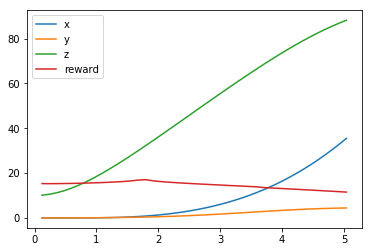

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.plot(results['time'], results['reward'], label='reward')



plt.legend()
_ = plt.ylim()



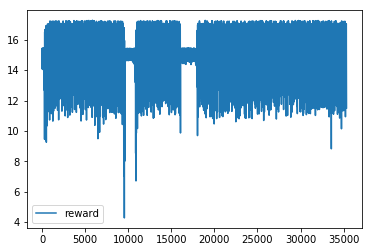

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episodes['reward'], label='reward')
plt.legend()
_ = plt.ylim()






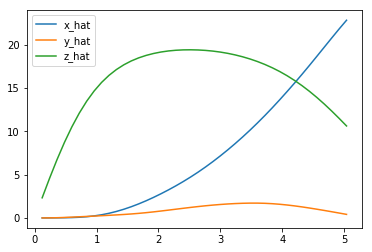

In [129]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()



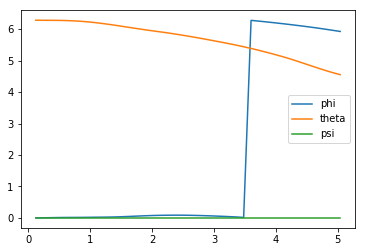

In [130]:

plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()




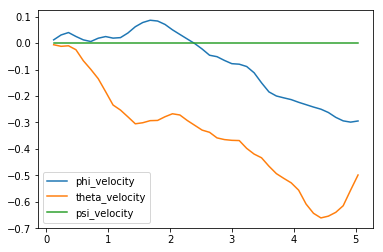

In [131]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()


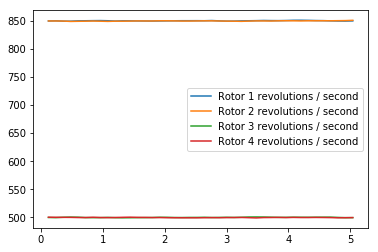

In [132]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [133]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)


[35.46717384  4.43786566 88.17342325  5.92663116  4.55386914  0.        ]
[22.820106    0.40936743 10.61688634]
[-0.29442691 -0.49877198  0.        ]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:



start at 10 high and move to hover at 30. the reward provides a reward for getting closer to 30
i tried a lot of different things for my reward.  keeping it below 1 by subtracting out when i wasn't near the height.  i tried making it huge with adding the velocities.

it was very difficult to keep it ever increasing.  

i experimented too much and things got very erractic

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

ddpg , gamma=0.99, tau=0.1

self.noise_mean = 0.5
self.noise_decay = 0.2
self.noise_variance = 4

dropout = .5

i trained for 300 episode as the scores seemed to work there

I have a two dense layer network with relu and a dropout. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

i suspect this should have been an easy task. it was hard.  

 my reward got very erratic and had trouble converging on the target height. 
 
 i had a few ahhha moments while experimenting with changing the reward to very high values.  getting the graphs working helped a lot to watch the results


tuning the noise and reward took a lot of trouble.  now i feel like it is too constained to be really practical




**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

the experience of shaping the reward and watching the reward grow during smaller numbers of episodes gives a pretty good idea of how well it is training. 

when i was satisfied it was continually growing, i set the episode count high and let it fly.


i find the agent, task, critic sort of models and coding design very pleasing way to break down a problem.